# Titanic Data Analysis


**Problem Statement**


---


What factors made people more likely to survive the sinking of the Titanic?

In [ ]:
# importing all libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

**Step 1: Collecting data**

In [ ]:
titanic_data = pd.read_csv('titanic.csv')
# titanic_data.head()
print('# of passengers in original data:', len(titanic_data))

# of passengers in original data: 891


**Step 2: Analyze data**

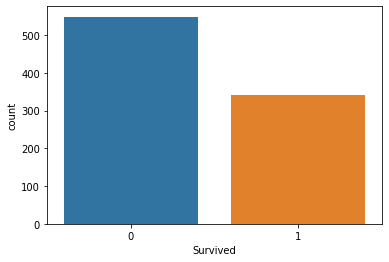

In [ ]:
# number of survived vs non-survived passengers
sns.countplot(x='Survived', data=titanic_data, )

*Above plot shows that there are less number of passengers who survived.*

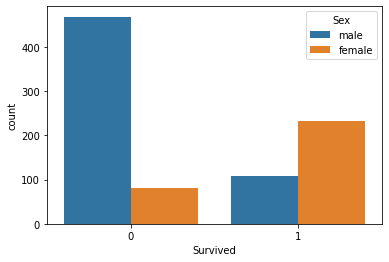

In [ ]:
# number of women vs men survived
sns.countplot(x='Survived', hue='Sex', data=titanic_data)

*Above plot shows that more females survived then men.*

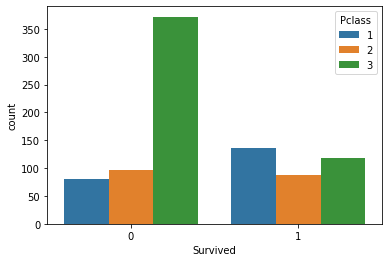

In [ ]:
# number of passengers survived that belongs to different class
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)

*Above graph shows that large number of Passengers that belongs to Pclass 3 has not survived.*

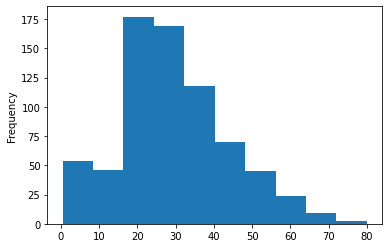

In [ ]:
# age group of passengers
titanic_data['Age'].plot.hist()

*Above histograph shows that there are more number of young passengers (age 18-40)*

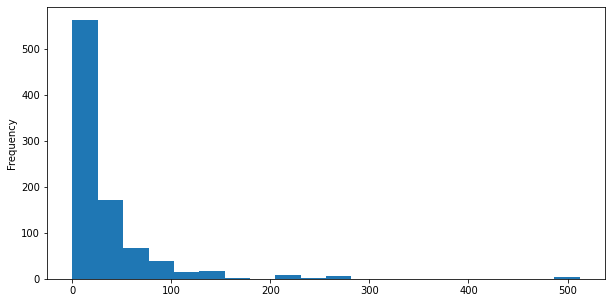

In [ ]:
titanic_data['Fare'].plot.hist(bins=20, figsize=(10, 5))

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


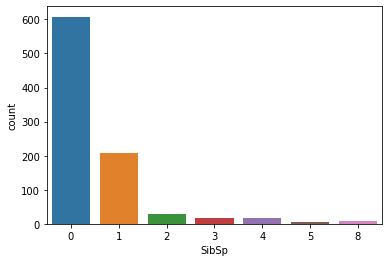

In [ ]:
# number of sibling/spouses above the titanic
sns.countplot(x='SibSp', data=titanic_data)

**Step 3: Data wrangling**

In [ ]:
# let's check whether our data contain null values
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

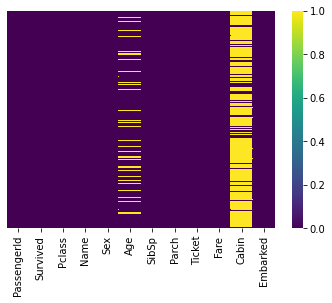

In [ ]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cmap='viridis')

*From results we came to know that there are large number of missing data in cabin column and age, and 2 data in Embarked.*

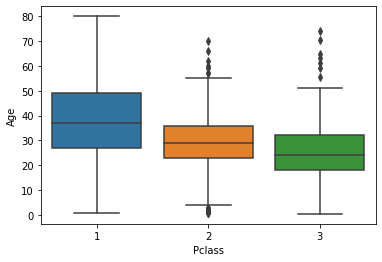

In [ ]:
sns.boxplot(x='Pclass', y='Age', data=titanic_data)

*The passengers who are older then others are travelling in 1st class.*

We will do imputation now.

**Imputation** is the process of replacing missing data with substituted values

In [ ]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


*Survived column has categorical value in which we can apply logistic regression.*

*Cabin has large number of null values so we can drop that column.*

In [ ]:
# dropping table column
titanic_data.drop("Cabin", axis=1, inplace=True)
# dropping all null values
titanic_data.dropna(inplace=True)

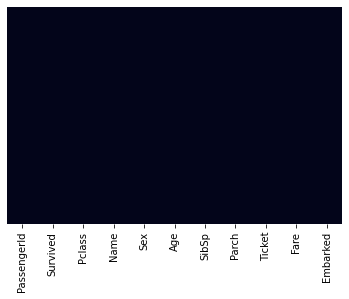

In [ ]:
# let's check all null values are dropped or not
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False)

In [ ]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now our data set is clean.

But our data set has lot of string values we have to convert that data into catergorical values to apply logistic regression. Since Logistic regression can applied only to numeric data.

In [ ]:
# pd.get_dummies(titanic_data['Sex'])
# since we can guess sex from only one column so drop the first column
sex = pd.get_dummies(titanic_data['Sex'], drop_first=True)
# now 1 denotes male and 0 denotes female
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [ ]:
# pd.get_dummies(titanic_data['Embarked'])
# C Q S  we can drop first column since we can guess from other two columns
embark = pd.get_dummies(titanic_data['Embarked'], drop_first=True)
# if Q S are 0 0 then definitely C will be 1
embark.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [ ]:
# pd.get_dummies(titanic_data['Pclass'])
# 1 2 3  we can drop first column since we can guess from other two columns
pcl = pd.get_dummies(titanic_data['Pclass'], drop_first=True)
# if 2 3 class are 0 0 then definitely class 1 will be 1
pcl.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


Now concatenate all columns to main data

In [ ]:
titanic_data = pd.concat([titanic_data, sex, embark, pcl], axis = 1)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


Drop unrelevant data from the table like Sex, Pclass, Embarked, passengers Id, Name and 
Ticket.

In [ ]:
titanic_data.drop(['Sex', 'Pclass', 'Embarked', 'PassengerId', 'Name', 'Ticket'], axis = 1, inplace=True)
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


**Step 4: Train & Test Data**

Train Data

In [ ]:
y = titanic_data['Survived'] # we have to guess this
X = titanic_data.drop('Survived', axis=1) # others are features data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=400) # increase max_iter for better performance
logmodel.fit(X_train.values, y_train.values) # .values is used to give only values not whole dataframe

LogisticRegression(max_iter=400)

Test Data

In [ ]:
predictions = logmodel.predict(X_test.values)

from sklearn.metrics import classification_report
report = classification_report(y_test.values, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       126
           1       0.72      0.72      0.72        88

    accuracy                           0.77       214
   macro avg       0.76      0.76      0.76       214
weighted avg       0.77      0.77      0.77       214



**Step 5: Accuracy Check**

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test.values, predictions)

array([[102,  24],
       [ 25,  63]])

In [ ]:
# to know accuracy of model -> (102+63)/(102+24+25+63)
from sklearn.metrics import accuracy_score
accuracy_score(y_test.values, predictions)

0.7710280373831776

# SUV Data Analysis

**Problem Statement**


---


A car company has released a new SUV in the market, Using the previous data about the sales of their SUV's, they want to predict the category of people who might be interested in buying this.

What factors made people more interested in buying SUV?

**Step 1: Collecting data**

In [18]:
import numpy as np
import matplotlib as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

dataset = pd.read_csv('suv_data.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Step 2: Analyzing data**

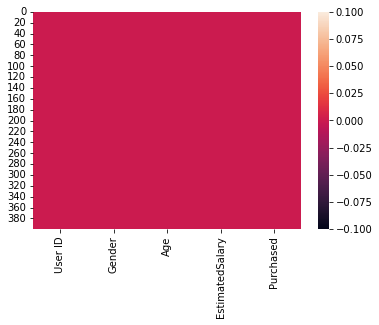

In [4]:
sns.heatmap(pd.isnull(dataset))

*From this there is no null value present.*

In [5]:
dataset.head(4)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0


*Here User ID and Gender will not affect the Purchase of SUV then Age and EstimatedSalary are two dependent variables.*

**Step 3: Data Wrangling**

In [19]:
# droping User ID and Gender
dataset.drop(['User ID', 'Gender'], axis=1, inplace=True)
dataset.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


**Step 4: Train & Test**

In [26]:
# Train
y = dataset['Purchased'].values # variable we have to find
dataset.drop('Purchased', axis=1, inplace=True)
X = dataset.values # features

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


# scaling data -  it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=400, random_state=0)
# fitting train data to model
model.fit(X_train, y_train)

KeyError: ignored

In [21]:
# Test
predictions = model.predict(X_test)

from sklearn.metrics import classification_report
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



**Step 5: Accuracy Check**

In [23]:
from sklearn.metrics import confusion_matrix
# pass actual values and predictions
confusion_matrix(y_test, predictions)

array([[65,  3],
       [ 8, 24]])

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.89